# **food-sales-predictions**

*Coding Dojo::Data Science::Project 1 (Core)*

Olen Sluder

*A portfolio project demonstrating sales prediction for food items sold at various stores. The goal is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.*

## Parts 1 & 2

**Part 1 Objective**: Create the project repository.

- Create a GitHub Account
- Set up a GitHub repository that will house your first portfolio project.
- Add Markdown cells with your name and section headers to the notebook.
- Add the Google Colab Notebook to your GitHub repository.

**Part 2 Objective**: Practice using Pandas to clean and explore data.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about [80% of our time is spent on data preparation](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=478ec4796f63) - so this is a very important step!

- Download the data using this link: [download the data](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing). (Note: [Original data source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).)
- Insert code below the heading "Loading Data"
    - Use Pandas to read the sales prediction data set into Google Colab.
    - Use `df.info()` and `df.head()` methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
    - Explore the data - what do you need to do to clean this data? Clean it!
    - Be sure to address each of the following tasks:
        1. How many rows and columns?
        1. What are the datatypes of each variable?
        1. Are there duplicates? If so, drop any duplicates.
        1. Identify missing values.
        1. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
        1. Confirm that there are no missing values after addressing them.
        1. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
        1. For any numerical columns, obtain the summary statistics of each (min, max, mean).
- Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset:
    - [Missing Data, its types, and statistical methods to deal with it](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f).
    - [6 Different Ways to Compensate for Missing Values In a Dataset](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779).
    - [Dealing with missing data: Key assumptions and methods for applied analysis](http://www.bu.edu/sph/files/2014/05/Marina-tech-report.pdf).

### Data Dictionary

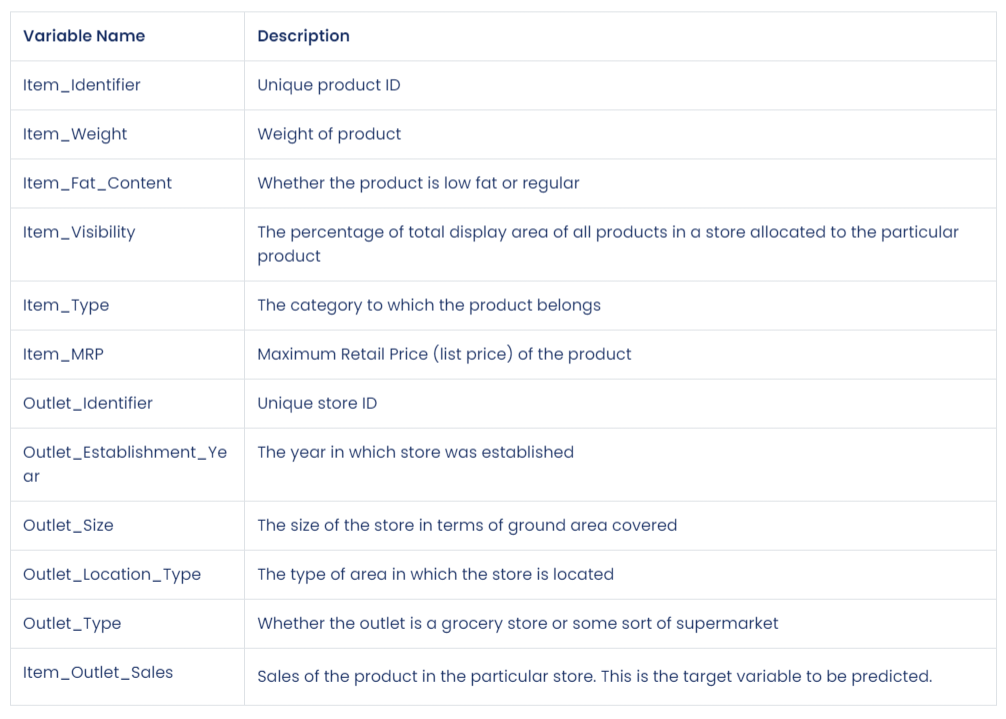

### Library Imports

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

Load the dataset, get some info, and look at the first few rows of data:

In [359]:
dataset = 'sales_predictions.csv'
df = pd.read_csv(dataset)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Cleaning

#### Shape and Data Types

Check the number of rows and columns in the dataset:

In [360]:
print(f'There are {df.shape[0]:,} rows and {df.shape[1]:,} columns.')

There are 8,523 rows and 12 columns.


Check the data types:

In [361]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

> The data types all appear correct based on the sample of data seen with `head()`.

#### Duplicates

Check for duplicates:

In [362]:
print(f'There are {df.duplicated().sum()} duplicates.')

There are 0 duplicates.


#### Missing Data

Helper function(s):

In [363]:
def display_missing_data(data):
  """Display a pandas DataFrame's columns with missing data"""
  # TODO: Handle a non-pandas DataFrame better
  try:
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data > 0]
    if len(missing_data) == 0:
      print('There is no missing data.')
    else:
      print(missing_data)
  except AttributeError:
    print('Not a pandas DataFrame.')
 
  return

Check for missing data:

In [364]:
display_missing_data(df)

Item_Weight    1463
Outlet_Size    2410
dtype: int64


Fill missing item weights:

Approach: Fill missing weights from other rows of the same item identifier.

In [365]:
# Create filter of items missing weights and create lookup dataframe of item weights
items_missing_weights = df[df['Item_Weight'].isna()]['Item_Identifier']
filter = df['Item_Identifier'].isin(items_missing_weights)
missing_item_weights = df[filter][['Item_Identifier', 'Item_Weight']]
missing_item_weights = missing_item_weights.dropna()
missing_item_weights = missing_item_weights.drop_duplicates()

# Fill missing weights from lookup dataframe
for item in missing_item_weights['Item_Identifier']:
  filter = missing_item_weights['Item_Identifier'] == item
  weight = missing_item_weights[filter]['Item_Weight'].iloc[0]
  filter = df['Item_Identifier'] == item
  df[filter] = df[filter].fillna({'Item_Weight': weight})

# Check for missing data
display_missing_data(df)

Item_Weight       4
Outlet_Size    2410
dtype: int64


Approach: Fill missing weights with the mean of that item type's weight.

In [366]:
# Create dataframe of item types missing weights
item_types_missing_weights = df[df['Item_Weight'].isna()]['Item_Type']
item_types_missing_weights = item_types_missing_weights.dropna()
item_types_missing_weights = item_types_missing_weights.drop_duplicates()

# Fill remaining missing weights with mean of that item type's weight
for item_type in item_types_missing_weights:
  filter = df['Item_Type'] == item_type
  weight = df[filter]['Item_Weight'].mean()
  df[filter] = df[filter].fillna({'Item_Weight': weight})

# Check for missing data
display_missing_data(df)

Outlet_Size    2410
dtype: int64


Fill missing outlet sizes:

Explore the outlet identifier, size, and type value counts to see if there appears to be any relationships.

In [367]:
df[["Outlet_Identifier", "Outlet_Size", "Outlet_Type"]].value_counts(dropna=False)

Outlet_Identifier  Outlet_Size  Outlet_Type      
OUT027             Medium       Supermarket Type3    935
OUT013             High         Supermarket Type1    932
OUT035             Small        Supermarket Type1    930
OUT046             Small        Supermarket Type1    930
OUT049             Medium       Supermarket Type1    930
OUT045             NaN          Supermarket Type1    929
OUT018             Medium       Supermarket Type2    928
OUT017             NaN          Supermarket Type1    926
OUT010             NaN          Grocery Store        555
OUT019             Small        Grocery Store        528
dtype: int64

There does not appear to be any relationship between outlet size and type for supermarkets that can be used to fill missing values, but grocery stores are likely all small, so fill missing grocery store values with 'Small' and supermarkets with 'Unknown'.

In [368]:
filter = df['Outlet_Type'] == 'Grocery Store'
df[filter] = df[filter].fillna({'Outlet_Size': 'Small'})
df = df.fillna({'Outlet_Size': 'Unknown'})

Confirm there is no longer any missing data:

In [369]:
display_missing_data(df)

There is no missing data.


#### Unique Values

Check the number of unique values:

In [370]:
df.nunique()

Item_Identifier              1559
Item_Weight                   419
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Check the item identifier values:

In [371]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

> These values look reasonable.

Check the item fat content values:

In [372]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

> This categorical data needs to be standardized. Based on the higher counts for these values, the correct values should be 'Low Fat' and 'Regular'.

Standardize the values in item fat content:

In [373]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts() # verify the data is correct

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Check the item type values:

In [374]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

> These values look reasonable.

Check the outlet identifier values:

In [375]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

> These values look reasonable.

Check the outlet size values:

In [376]:
df['Outlet_Size'].value_counts()

Small      2943
Medium     2793
Unknown    1855
High        932
Name: Outlet_Size, dtype: int64

> These values look reasonable.

Check the outlet location type values:

In [377]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

> These values look reasonable.

Check the outlet type values:

In [378]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

> These values look reasonable.

#### Numeric Types

In [379]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.066132,140.992782,1997.831867,2181.288914
std,4.645016,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


> These values look reasonable.

## Part 3

**Part 3 Objective**: The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

### Univariate Exploratory Data Analysis

#### Helper function(s)

In [380]:
def plot_numeric_column(df, col):
  """Plot a histogram and boxplot for the specified column"""
  ## Create the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  sns.histplot(data=df, x=col, ax=axes[0])

  mean_value = df[col].mean()
  axes[0].axvline(mean_value,
                  color='red', 
                  ls='--', 
                  label=f"Mean Value = ${mean_value:,.2f}")

  median_value = df[col].median()
  axes[0].axvline(median_value,
                  color='black', 
                  ls='--', 
                  label=f"Median Value = ${median_value:,.2f}")

  sns.boxplot(data=df, x=col, ax=axes[1])

  axes[0].set_title(f'Exploratory Data Analysis of {col}')

  plt.tight_layout()
  plt.show()

  return


def plot_categorical_column(data, col, figsize=(10,5)):
  """"""
  fig, ax = plt.subplots(figsize=figsize)
  counts = df[col].value_counts().sort_values(ascending=False).to_frame()

  sns.barplot(data=counts, x=counts.index, y=counts[col], ax=ax)

  plt.xticks(rotation=90)
  ax.set_title(f'Exploratory Data Analysis of {col}')
  ax.set_ylabel('Counts')
  plt.show()

  return

#### Numeric Data Analysis

We will first perform EDA on the numeric columns.

In [381]:
df.select_dtypes('number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

We will not analyze the outlet establishment year as it will just give counts of when outlets were established.

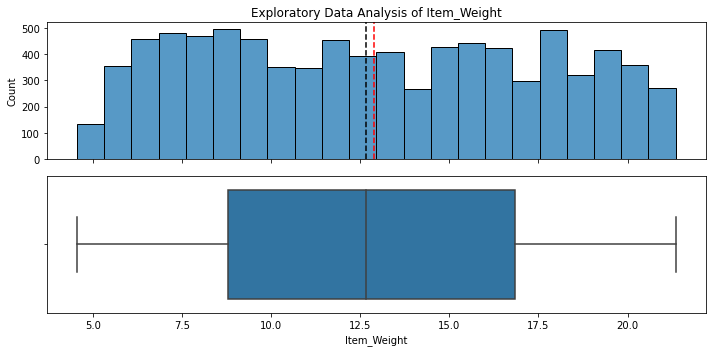

In [382]:
plot_numeric_column(df, 'Item_Weight')

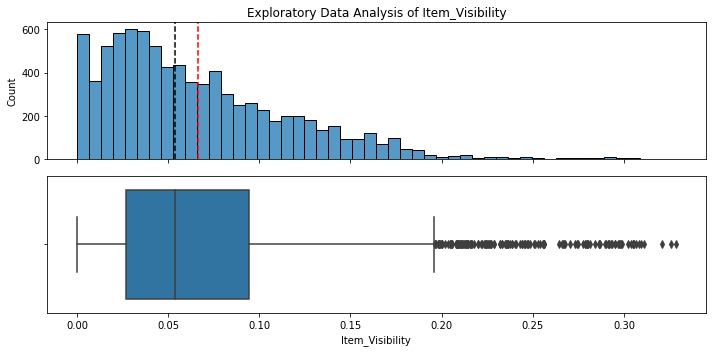

In [383]:
plot_numeric_column(df, 'Item_Visibility')

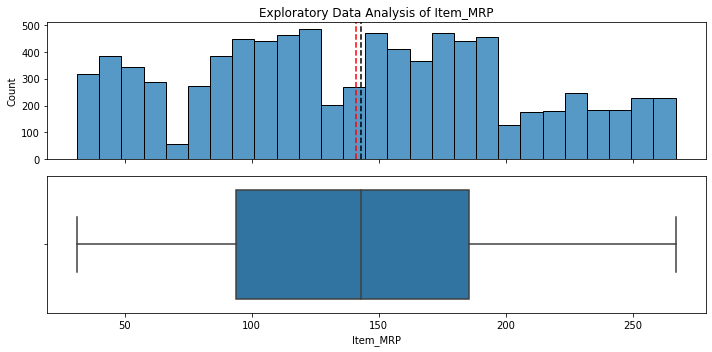

In [384]:
plot_numeric_column(df, 'Item_MRP')

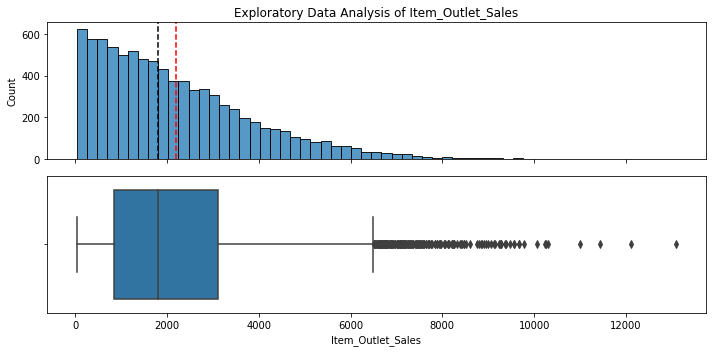

In [385]:
plot_numeric_column(df, 'Item_Outlet_Sales')

Next we will take a look at the catehgorical columns.

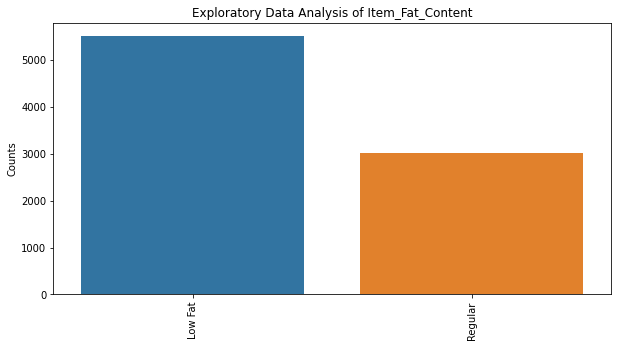

In [386]:
plot_categorical_column(df, 'Item_Fat_Content')

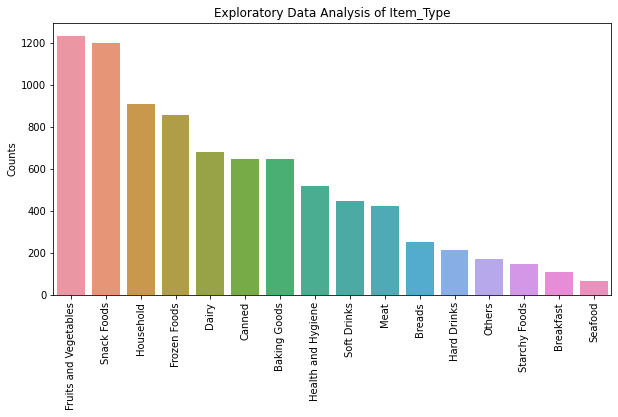

In [387]:
plot_categorical_column(df, 'Item_Type')

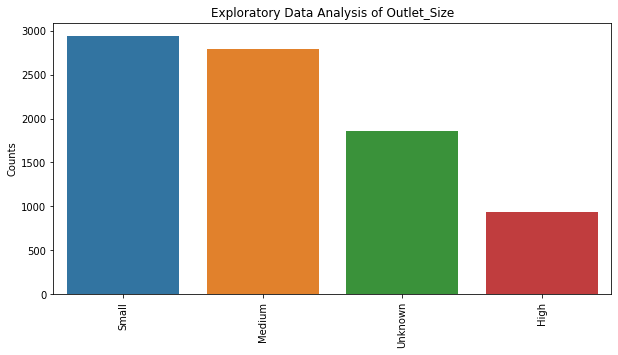

In [388]:
plot_categorical_column(df, 'Outlet_Size')

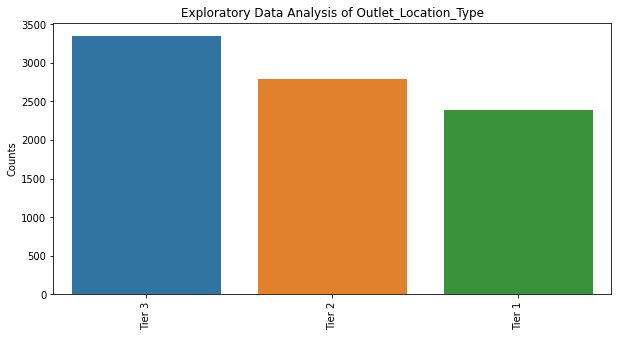

In [389]:
plot_categorical_column(df, 'Outlet_Location_Type')

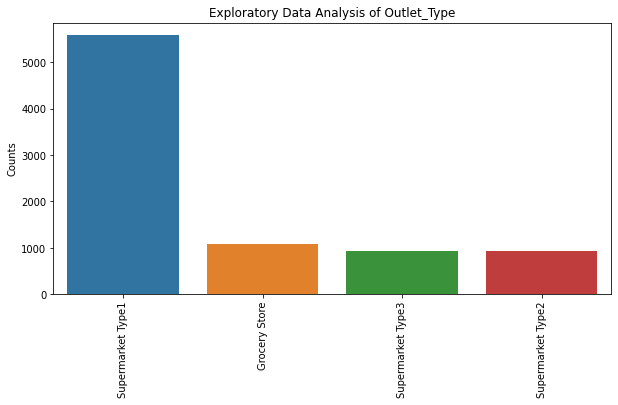

In [390]:
plot_categorical_column(df, 'Outlet_Type')

### Multivariate Exploratory Data Analysis

#### Heatmap

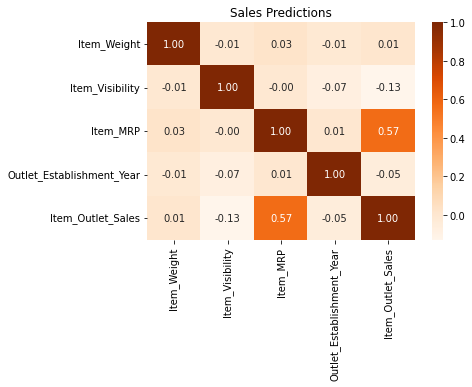

In [391]:
corr = df.corr()
ax = sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f')
ax.set_title('Sales Predictions')
plt.show()

> There is a moderate positive correlation between the item outlet sales and an item's MRP.

#### Pairplot

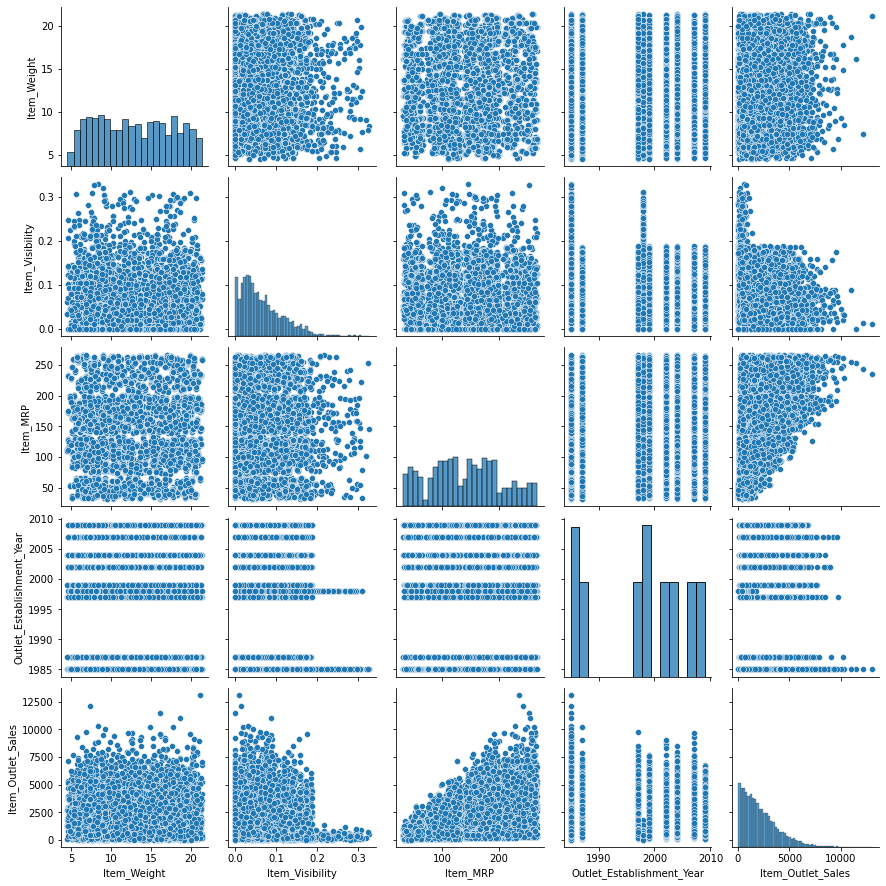

In [392]:
sns.pairplot(df)
plt.show()